<hr style="height:10px">

<div class='container2'>
		<div>
			<img src='https://drive.google.com/file/d/13IXAHRx14IcuGjzXtLObnlZy1Dx-RCpH/view?usp=sharing' ALIGN='left' style='width:10em'>
		</div>
	<div style='padding: 0 7em 2em 12em;'>
	<h1>Laboratório de Inovação e Automação 1 (LIA 1)</h1>
    <div style="font-size:12pt;float:left;"><b>Projetos de Inteligência Artificial - Análise Exploratória de Dados </b></div>
	</div>
</div>

 <hr style="height:5px">
    
<h2>Análise Exploratória de Dados - <a href="https://www.kaggle.com/datasets/gpiosenka/butterfly-images40-species">Butterfly Dataset </a> </h2>

Notebook desenvolvido por: <a href="https://br.linkedin.com/in/larissa-rosa-82736b215">Larissa Silva Xavier Rosa</a>

 <hr style="height:2px">

In [ ]:
# Confirmar a versão da Linguagem Python instalada
from platform import python_version
print(f'A versão da linguagem Python usada neste projeto é a {python_version()}!')

A versão da linguagem Python usada neste projeto é a 3.12.7!


---
# 1. Importações de Bibliotecas

Será utilizado o conjunto de dados que se encontra no diretório `\content\datasets`, em formato de arquivo `.csv`.

In [2]:
# -*- coding: utf-8 -*-

# importar a biblioteca usada para trabalhar com vetores e matrizes
import os
import numpy as np

# importar a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
import kagglehub
import pandas as pd

# importar as bibliotecas usadas para geração de gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

---
# 2. Carregar e Exibir os Dados

## Apresentação da base de dados

A base de dados Buterfly será usada para apresentação dos conceitos a serem estudados.

> Primeiro: vamos fazer o download do conjunto de dados

In [3]:
# Configuração de estilo
sns.set_style("whitegrid")

# Download do dataset via KaggleHub
path = kagglehub.dataset_download("gpiosenka/butterfly-images40-species")
print("Path to dataset files:", path)

100%|██████████| 399M/399M [00:04<00:00, 96.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/gpiosenka/butterfly-images40-species/versions/13


In [6]:
dst = '/content/dataset'
os.rename(path,dst)

> Segundo: vamos importar os dados para o dataframe.

In [7]:
# Caminho para o arquivo CSV do dataset Butterfly Images
csv_path = os.path.join(dst, "butterflies and moths.csv")  # Ajuste para o caminho correto

In [11]:
# Carregar os dados
df_dataset = pd.read_csv(csv_path)
print("Dados carregados com sucesso!")
display(df_dataset)

Dados carregados com sucesso!


class id                    filepaths           labels data set
0             0         train/ADONIS/001.jpg           ADONIS    train
1             0         train/ADONIS/002.jpg           ADONIS    train
2             0         train/ADONIS/003.jpg           ADONIS    train
3             0         train/ADONIS/004.jpg           ADONIS    train
4             0         train/ADONIS/005.jpg           ADONIS    train
...         ...                          ...              ...      ...
13589        99  valid/ZEBRA LONG WING/1.jpg  ZEBRA LONG WING    valid
13590        99  valid/ZEBRA LONG WING/2.jpg  ZEBRA LONG WING    valid
13591        99  valid/ZEBRA LONG WING/3.jpg  ZEBRA LONG WING    valid
13592        99  valid/ZEBRA LONG WING/4.jpg  ZEBRA LONG WING    valid
13593        99  valid/ZEBRA LONG WING/5.jpg  ZEBRA LONG WING    valid

[13594 rows x 4 columns]

## Informações Gerais do Dataset
Esta etapa nos ajuda a entender o formato dos dados, os tipos de variáveis e se há valores ausentes.

In [12]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13594 entries, 0 to 13593
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   class id   13594 non-null  int64 
 1   filepaths  13594 non-null  object
 2   labels     13594 non-null  object
 3   data set   13594 non-null  object
dtypes: int64(1), object(3)
memory usage: 424.9+ KB


---
# 3. Pré-processamento

Minimizar ou eliminar problemas existentes em um conjunto de dados, bem como torná-los mais adequados para sua utilização por um determinado algoritmo de aprendizagem de máquina.


---
## 3.1 Tratamento de atributos com valores ausentes

Verificar se existem atributos com valores ausentes (NaN) na base de dados.

In [15]:
# índices das linhas que contém valores NaN
idxRowNan = pd.isnull(df_dataset).any(axis=1).to_numpy().nonzero()

# imprime apenas as linhas com valores ausentes
display(df_dataset.iloc[idxRowNan])

Empty DataFrame
Columns: [class id, filepaths, labels, data set]
Index: []

In [20]:
print(df_dataset.isnull().sum())

class id     0
filepaths    0
labels       0
data set     0
dtype: int64


---
## 3.3 Tratamento de dados inconsistentes ou redundantes

Verificar se existem dados inconsistentes ou redundantes. A forma mais comum de inconsistência é quando há registros representados por atributos com todos os valores iguais, mas com diagnóstico diferentes. A redundância é dada pela repetição de linhas na base de dados.

In [16]:
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['filepaths','labels','data set'],keep=False)]

# se houver valores redundantes ou inconsistentes, imprima
if len(df_duplicates) > 0:
    print('\nObjeto(s) redundante(s) e/ou inconsistente(s):')
    display(df_duplicates)
else:
    print('Não existem objetos redundantes e/ou inconsistentes!')

Não existem objetos redundantes e/ou inconsistentes!


Após remover os objetos redundantes, é preciso checar se há registros inconsistentes.

In [17]:
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['filepaths','labels','data set'],keep=False)]

# se existir objetos inconsistentes, exibir
if len(df_duplicates)>0:
    print('\nObjeto(s) inconsistente(s):')
    display(df_duplicates)
else:
    print('Não existem objetos redundantes e/ou inconsistentes!')


Não existem objetos redundantes e/ou inconsistentes!


In [18]:
display(df_dataset.tail())

class id                    filepaths           labels data set
13589        99  valid/ZEBRA LONG WING/1.jpg  ZEBRA LONG WING    valid
13590        99  valid/ZEBRA LONG WING/2.jpg  ZEBRA LONG WING    valid
13591        99  valid/ZEBRA LONG WING/3.jpg  ZEBRA LONG WING    valid
13592        99  valid/ZEBRA LONG WING/4.jpg  ZEBRA LONG WING    valid
13593        99  valid/ZEBRA LONG WING/5.jpg  ZEBRA LONG WING    valid

---
# 4. Análise dos Dados
A análise das características presentes em um conjunto de dados permite a descoberta de padrões e tendências que podem fornecer informações valiosas para compreender o processo que gerou os dados.

In [27]:
num_classes = df_dataset['labels'].nunique()
print(f"Número total de espécies: {num_classes}")

Número total de espécies: 100


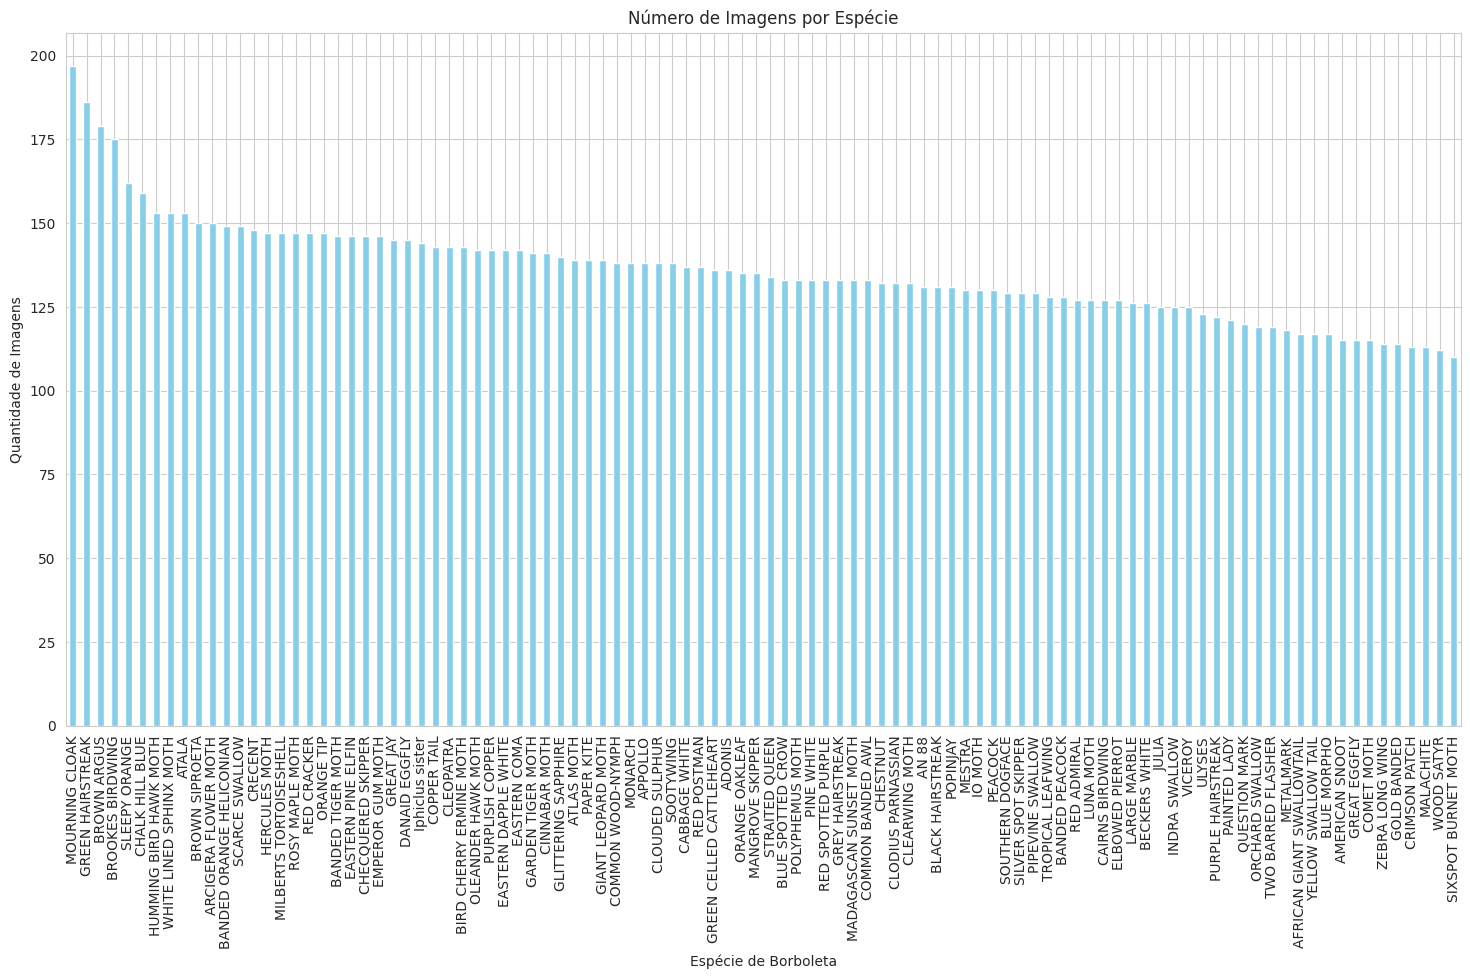

In [28]:
class_counts = df_dataset['labels'].value_counts()
plt.figure(figsize=(18, 9))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Espécie de Borboleta")
plt.ylabel("Quantidade de Imagens")
plt.title("Número de Imagens por Espécie")
plt.xticks(rotation=90)
plt.show()

---
## 4.1 Visualização das imagens das espécies

In [35]:
%cd $dst

/content/dataset


In [32]:
import math

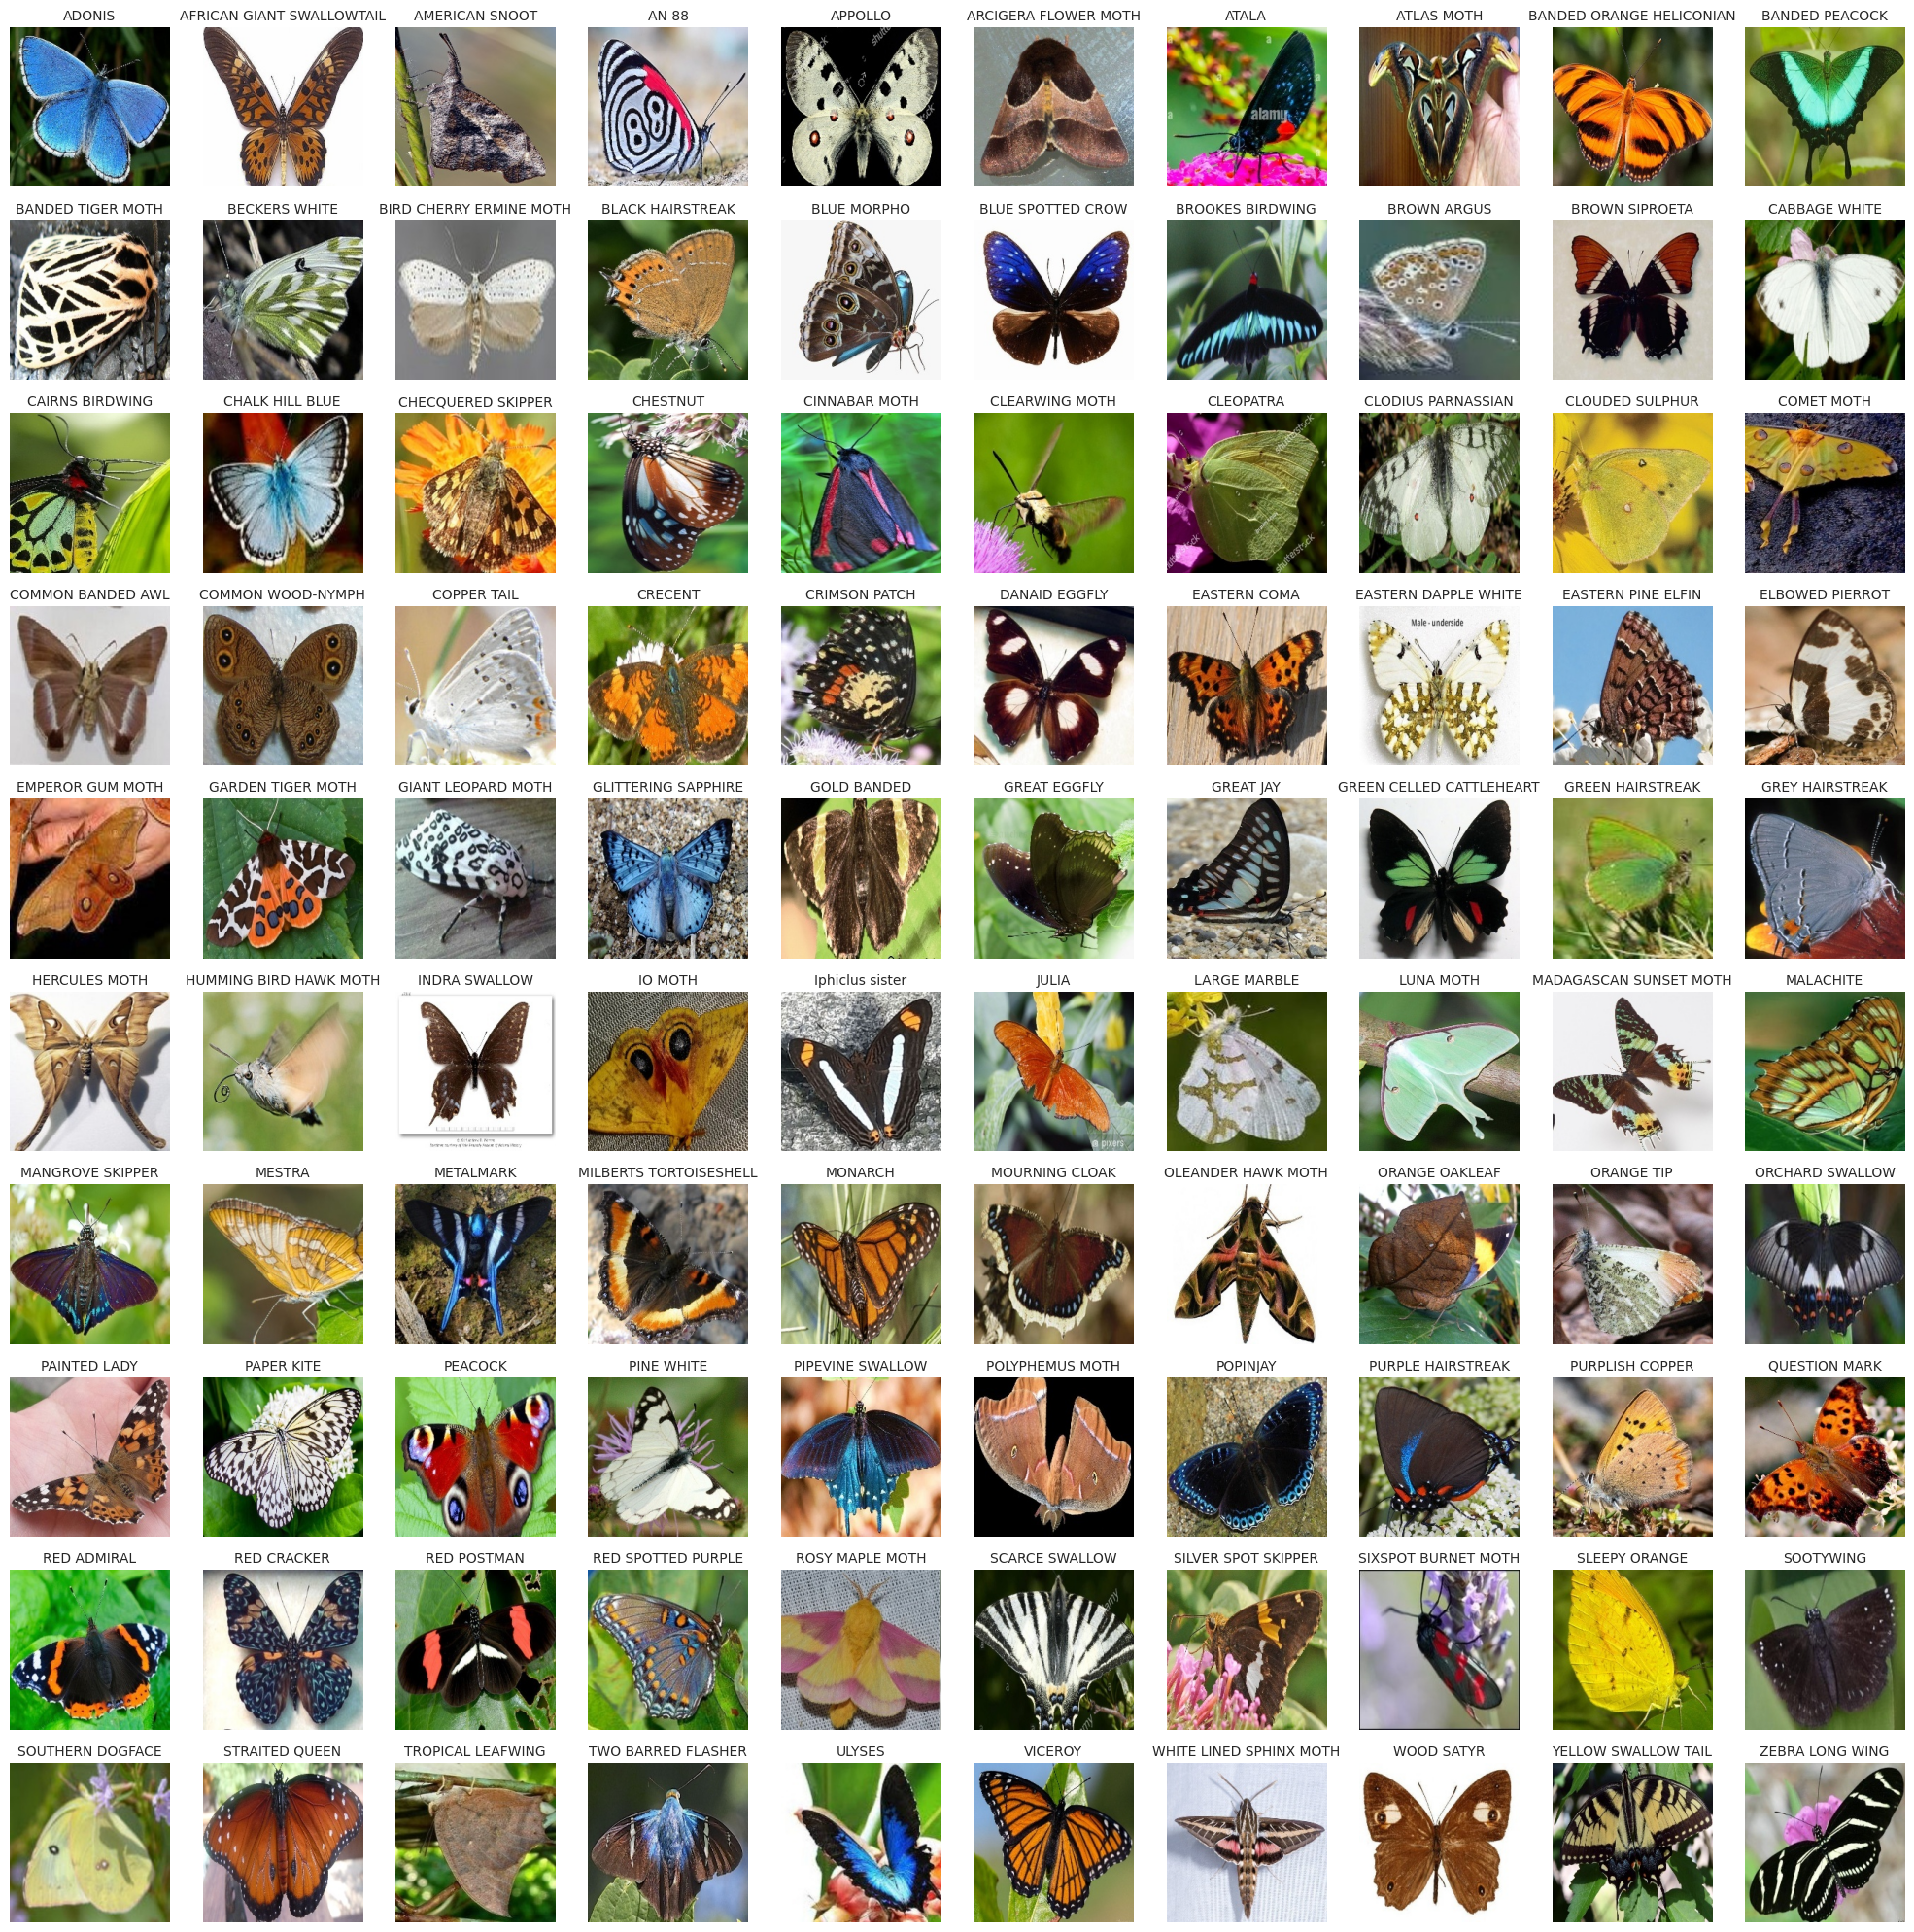

In [34]:
species = df_dataset['labels'].unique()
num_classes = len(species)

# Definir o número de colunas e calcular o número de linhas necessárias
cols = 10
rows = math.ceil(num_classes / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 2 * rows))

# Achatar a matriz de eixos para facilitar a iteração
axes = axes.flatten()

# Percorrer cada espécie e exibir uma imagem
for i, species_name in enumerate(species):
    sample_image = df_dataset[df_dataset['labels'] == species_name].iloc[0]
    img = mpimg.imread(sample_image['filepaths'])

    axes[i].imshow(img)
    axes[i].set_title(species_name, fontsize=10)
    axes[i].axis('off')

# Ocultar eixos vazios caso o número de classes não seja múltiplo de cols
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()